In [61]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from add_drive_cost import get_cost, get_dur

warnings.filterwarnings("ignore")


df = pd.read_csv('rides_final.csv', sep=',', skipinitialspace=True, encoding='utf-8')
df['end_date'] = df['end_date'].apply(lambda x: x[:19])

,Unnamed: 0,unnamed:_0,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration_sec,speed,speed_var,go,time_quantile,distance_diff
0,0,0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,0,1422.0,2.861463,normal,майскаяоктябрьскиймайскаяоктябрьский,5.0,0.000000e+00
1,1,1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,0,1705.0,2.648094,normal,спортивнаяоктябрьскийспортивнаяоктябрьский,7.0,0.000000e+00
2,2,2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,0,2299.0,1.966072,normal,сувороваленинскийсувороваленинский,9.0,0.000000e+00
3,3,3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,0,1909.0,2.033002,normal,рабочаясеверо-западныйрабочаясеверо-западный,8.0,-4.547474e-13
4,4,4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,0,1840.0,2.189674,normal,юбилейнаяюго-восточныйюбилейнаяюго-восточный,8.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97367,102250,102250,197707,2023-07-31 23:45:06,2023-08-01 00:06:55,озерная,юго-восточный,первомайская,северо-западный,3302.0,0,1309.0,2.522536,normal,первомайскаясеверо-западныйпервомайскаясеверо-...,4.0,0.000000e+00
97368,102251,102251,197708,2023-07-31 23:46:01,2023-08-01 00:25:35,мичурина,ленинский,садовая,заречный,4992.0,0,2374.0,2.102780,normal,садоваязаречныйсадоваязаречный,10.0,0.000000e+00
97369,102252,102252,197709,2023-07-31 23:48:04,2023-08-01 00:09:21,лермонтова,ленинский,куйбышева,центральный,2781.0,0,1277.0,2.177760,normal,куйбышевацентральныйкуйбышевацентральный,4.0,0.000000e+00
97370,102253,102253,197710,2023-07-31 23:51:41,2023-08-01 00:38:04,рябиновая,северо-западный,энергетиков,юго-восточный,6466.0,0,2783.0,2.323392,normal,энергетиковюго-восточныйэнергетиковюго-восточный,10.0,0.000000e+00


In [62]:
df.columns

Index(['Unnamed: 0', 'unnamed:_0', 'id', 'start_date', 'end_date',
       'start_location', 'start_district', 'end_location', 'end_district',
       'distance', 'promo', 'duration_sec', 'speed', 'speed_var', 'go',
       'time_quantile', 'distance_diff'],
      dtype='object')

In [63]:
df['drive_dur'] = df.apply(lambda row: get_dur(*row[['start_date', 'end_date']]), axis=1)
lower_bound = df.drive_dur.quantile(q=0.025)
upper_bound = df.drive_dur.quantile(q=0.975)
df['drive_dur'] = df[(lower_bound < df.drive_dur) & (df.drive_dur < upper_bound)]['drive_dur']
df['drive_cost'] = df.apply(lambda row: get_cost(*row[['start_date', 'drive_dur', 'promo']]), axis=1)

In [64]:
print(df[df['promo'] == 1].shape)

(1911, 19)


Видим, что всего промокод был использован в 2006 поездках. 
Можем посчитать, что на бесплатном старте мы потеряли 2006 * 30 = 60180 рублей

In [65]:
print(df[df['promo'] == 1]['drive_cost'].sum())

174292.0


Несмотря на бесплатный старт мы все равно получили 194396 рублей выручки.


Таким образом с данных поездок мы извлекли 194396 - 60180 = 134216 рублей чистой прибыли

<Axes: >

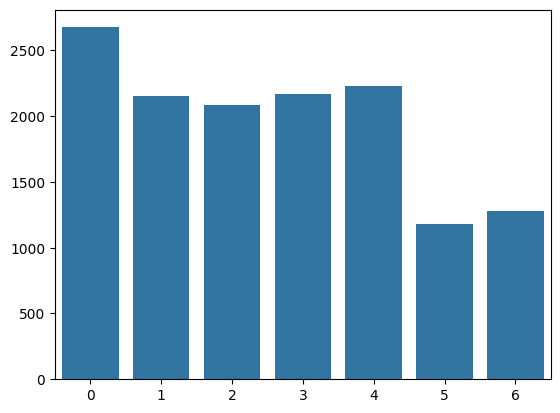

In [66]:
def get_weekday(date_str: str):
    return dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S').weekday()


def check(date_str: str):
    date = dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return 6 <= date.hour <= 9


df_morning = df[df['start_date'].apply(check)]
weekday = df_morning['start_date'].apply(get_weekday)
weekdays_cnt = [len(df_morning[weekday == wd]) for wd in range(7)]
sns.barplot(weekdays_cnt)

Видим, что по понедельникам с 6 до 10 утра трафик действительно выше, чем в другие дни

<Axes: >

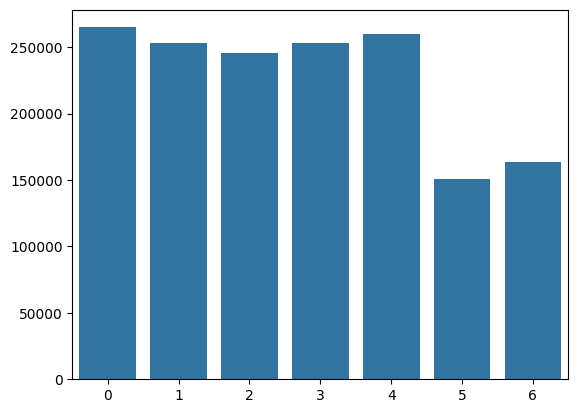

In [67]:
weekdays_sum = [df_morning[weekday == wd]['drive_cost'].sum() for wd in range(7)]
sns.barplot(weekdays_sum)

<Axes: ylabel='drive_dur'>

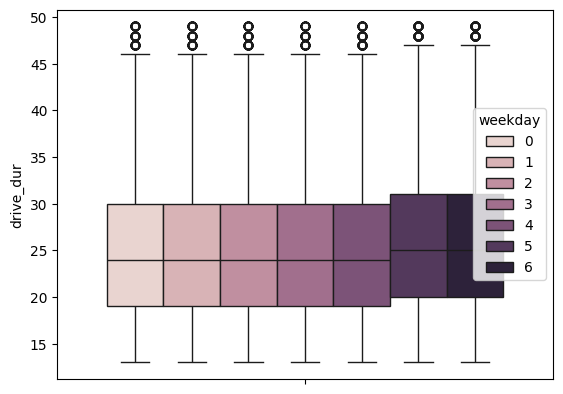

In [68]:
df['weekday'] = df['start_date'].apply(get_weekday)
sns.boxplot(data=df, y='drive_dur', hue='weekday')